Note: 10/20 (max réel : 26)
    
Cf commentaires techniques dans le fil du notebook.

# Cartographie avec OpenStreetMap

Par [Sébastien Boisgérault](mailto:sebastien.boisgerault@minesparis.psl.eu), Mines Paris - PSL

Licence: [Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)



## Préambule

Imports et fonctions utilitaires

In [1]:
# Standard library
import inspect

In [2]:
# Standard Library
import doctest as _doctest

 # Jupyter
import IPython.display

def doctest(item, docstring):
    item.__doc__ = docstring
    header = f"# `{item.__name__}`\n\n"
    cleandoc = inspect.cleandoc(item.__doc__) 
    markdown = IPython.display.Markdown(header + cleandoc)
    IPython.display.display(markdown)
    try:
        name = item.__name__
    except AttributeError:
        name = "(anonymous)"
    _doctest.run_docstring_examples(item, globs=globals(), name=name)

In [3]:
# Scientific Stack (NumPy + Matplotlib)
from numpy import *
from matplotlib.pyplot import *

-----

## Coordonnées GPS

La latitude et la longitude sont des coordonnées géographiques qui permettent de spécifier une position sur le globe terrestre. Plusieurs systèmes de représentation de ces grandeurs coexistent, notamment :

  - un système "traditionnel", basé sur la décomposition de la coordonnée en degrés, minutes, secondes (et direction cardinale) ; on parle également de description DMS ou [sexagésimale](https://fr.wikipedia.org/wiki/Syst%C3%A8me_sexag%C3%A9simal). Par exemple, décrire une latitude par `40°41'21.3"N` ou une longitude par `74°02'40.2"W`.
  
  - un système "rationnel", représentant la coordonnée en degrés comme un nombre décimal (DD). Par exemple, décrire une latitude par `40.68925` ou une longitude par `-74.0445`.
  

### Références

  - 📖 : [Degrees/Minutes/Seconds (DMS) vs Decimal Degrees (DD)](https://gisgeography.com/decimal-degrees-dd-minutes-seconds-dms/).




On choisit de représenter les directions cardinales par les nombres 1 ou -1 :

In [4]:
NORTH = EAST = 1
SOUTH = WEST = -1

 🏗️ Développez une fonction `gc_to_decimal` permettant de convertir la représentation DMS en DD.

In [5]:
def gc_to_decimal(degrees, minutes, seconds, direction):
    
    return((degrees + (minutes + (seconds)/60)/60) * direction )

gc_to_decimal(40,42,51, NORTH)

40.714166666666664

In [6]:
doctest(gc_to_decimal, """
Convert a geographic coordinate from sexagesimal (DMS) to decimal (DD) representation.

Arguments
---------

  - `degrees`: an `int` such that `0 <= degrees <= 180`

  - `minutes`: an `int` such that `0 <= minutes < 60`

  - `seconds`: a `float` such that `0.0 <= seconds < 60.0` 

  - `direction`: either `1` (`NORTH` or `EAST`) or `-1` (`SOUTH` or `WEST`)

Returns
-------

  - `degrees`: a `float` such that `-180.0 <= degrees <= 180.0`

Usage
-----

    >>> gc_to_decimal(40, 41, 21.3, NORTH)  # 40°41'21.3"N 
    40.689249999999994

    >>> gc_to_decimal(74, 2, 40.2, WEST)  # 74°02'40.2"W
    -74.0445
""")

# `gc_to_decimal`

Convert a geographic coordinate from sexagesimal (DMS) to decimal (DD) representation.

Arguments
---------

  - `degrees`: an `int` such that `0 <= degrees <= 180`

  - `minutes`: an `int` such that `0 <= minutes < 60`

  - `seconds`: a `float` such that `0.0 <= seconds < 60.0` 

  - `direction`: either `1` (`NORTH` or `EAST`) or `-1` (`SOUTH` or `WEST`)

Returns
-------

  - `degrees`: a `float` such that `-180.0 <= degrees <= 180.0`

Usage
-----

    >>> gc_to_decimal(40, 41, 21.3, NORTH)  # 40°41'21.3"N 
    40.689249999999994

    >>> gc_to_decimal(74, 2, 40.2, WEST)  # 74°02'40.2"W
    -74.0445

**********************************************************************
File "__main__", line ?, in gc_to_decimal
Failed example:
    gc_to_decimal(40, 41, 21.3, NORTH)  # 40°41'21.3"N 
Expected:
    40.689249999999994
Got:
    40.68925


 🏗️ Développer la fonctionnalité inverse, `gc_to_DMS`.
 
 ⚠️ Compte-tenu des erreurs d'arrondis, il est parfaitement normal que l'inversion ne soit pas rigoureusement exacte.

In [7]:
def gc_to_DMS(degrees):
    if degrees >= 0:
        d=1
    else :
         d=-1
            
    x = (degrees % 1) # partie décimale
    return (int (degrees), int (x * 60), (x*60 %1)*60 , d)

gc_to_DMS(40.71416666666)

(40, 42, 50.99999997599582, 1)

<div style="background-color:#ffd8a8;">
    
 Le test de `gc_to_DMS` montre qu'il y a un problème avec la conversion des représentations décimales négatives.
    
    

In [8]:
doctest(gc_to_DMS, """
Convert a geographic coordinate from decimal (DD) to sexagesimal (DMS) representation.

Arguments
---------

  - `degrees`: a `float` such that `-180.0 <= degrees <= 180.0`

Returns
-------

A 4-uple `(degrees, minutes, seconds, direction)` with:

  - `degrees`: an `int` such that `0 <= degrees <= 180`

  - `minutes`: an `int` such that `0 <= minutes < 60`

  - `seconds`: a `float` such that `0.0 <= seconds < 60.0` 

  - `direction`: either `1` (`NORTH` or `EAST`) or `-1` (`SOUTH` or `WEST`)

Usage
-----

    >>> gc_to_DMS(40.689249999999994)  # 40°41'21.3"N 
    (40, 41, 21.29999999997887, 1)

    >>> gc_to_DMS(-74.0445)  # 74°02'40.2"W
    (74, 2, 40.199999999997544, -1)

""")

# `gc_to_DMS`

Convert a geographic coordinate from decimal (DD) to sexagesimal (DMS) representation.

Arguments
---------

  - `degrees`: a `float` such that `-180.0 <= degrees <= 180.0`

Returns
-------

A 4-uple `(degrees, minutes, seconds, direction)` with:

  - `degrees`: an `int` such that `0 <= degrees <= 180`

  - `minutes`: an `int` such that `0 <= minutes < 60`

  - `seconds`: a `float` such that `0.0 <= seconds < 60.0` 

  - `direction`: either `1` (`NORTH` or `EAST`) or `-1` (`SOUTH` or `WEST`)

Usage
-----

    >>> gc_to_DMS(40.689249999999994)  # 40°41'21.3"N 
    (40, 41, 21.29999999997887, 1)

    >>> gc_to_DMS(-74.0445)  # 74°02'40.2"W
    (74, 2, 40.199999999997544, -1)

**********************************************************************
File "__main__", line ?, in gc_to_DMS
Failed example:
    gc_to_DMS(40.689249999999994)  # 40°41'21.3"N 
Expected:
    (40, 41, 21.29999999997887, 1)
Got:
    (40, 41, 21.299999999978922, 1)
**********************************************************************
File "__main__", line ?, in gc_to_DMS
Failed example:
    gc_to_DMS(-74.0445)  # 74°02'40.2"W
Expected:
    (74, 2, 40.199999999997544, -1)
Got:
    (-74, 57, 19.800000000002456, -1)


🏗️ Développez une fonction représentant une latitude et une longitude (en représentation DMS ou DD) comme une chaîne de caractères telle que `40°41'21.3"N` ou `74°02'40.2"W`.

⚠️ On limite volontairement la représentation des secondes à un chiffre après la virgule.

<div style="background-color:#ffd8a8;">
    
Pas de limitation de la précision dans la représentation
    

In [9]:
def gc_str(latitude, longitude):
    if type (longitude) == float:
        longitude = gc_to_DMS(longitude)
    if type (latitude) == float:
        latitude = gc_to_DMS(latitude)
    a,b,c,d = latitude
    w,x,y,z = longitude
    return( f'{a}' +'°'+f"{b}"+"'"+ f"{c}" + '"' + 'N' +"  " + f'{w}' +'°'+f"{x}"+"'"+ f"{y}" + '"' + 'W')

print(gc_str((40, 41, 21.3, 1), (74, 2, 40.2, -1)))
print(gc_str(40.689249999999994, -74.0445))

40°41'21.3"N  74°2'40.2"W
40°41'21.299999999978922"N  -74°57'19.800000000002456"W


In [10]:
doctest(gc_str, 
"""
Display latitude and longitude in the DMS format.

Arguments
---------

  - `latitude`: a 4-uple `(degrees, minutes, seconds, direction)` or a float `degrees`

  - `longitude`:  a 4-uple `(degrees, minutes, seconds, direction)` or a `float` `degrees`

Returns
-------

  - A string of the geographic location in the DMS (degrees, minutes, seconds) format.

    The seconds are represented with 1 digit after the decimal point.


Usage
-----

    >>> print(gc_str((40, 41, 21.3, 1), (74, 2, 40.2, -1)))
    40°41'21.3"N 74°2'40.2"W
    >>> print(gc_str((40, 41, 21.29999999997887, 1), (74, 2, 40.199999999997544, -1)))
    40°41'21.3"N 74°2'40.2"W
    >>> print(gc_str(40.689249999999994, -74.0445))
    40°41'21.3"N 74°2'40.2"W
    
""")

# `gc_str`

Display latitude and longitude in the DMS format.

Arguments
---------

  - `latitude`: a 4-uple `(degrees, minutes, seconds, direction)` or a float `degrees`

  - `longitude`:  a 4-uple `(degrees, minutes, seconds, direction)` or a `float` `degrees`

Returns
-------

  - A string of the geographic location in the DMS (degrees, minutes, seconds) format.

    The seconds are represented with 1 digit after the decimal point.


Usage
-----

    >>> print(gc_str((40, 41, 21.3, 1), (74, 2, 40.2, -1)))
    40°41'21.3"N 74°2'40.2"W
    >>> print(gc_str((40, 41, 21.29999999997887, 1), (74, 2, 40.199999999997544, -1)))
    40°41'21.3"N 74°2'40.2"W
    >>> print(gc_str(40.689249999999994, -74.0445))
    40°41'21.3"N 74°2'40.2"W
    

**********************************************************************
File "__main__", line ?, in gc_str
Failed example:
    print(gc_str((40, 41, 21.3, 1), (74, 2, 40.2, -1)))
Expected:
    40°41'21.3"N 74°2'40.2"W
Got:
    40°41'21.3"N  74°2'40.2"W
**********************************************************************
File "__main__", line ?, in gc_str
Failed example:
    print(gc_str((40, 41, 21.29999999997887, 1), (74, 2, 40.199999999997544, -1)))
Expected:
    40°41'21.3"N 74°2'40.2"W
Got:
    40°41'21.29999999997887"N  74°2'40.199999999997544"W
**********************************************************************
File "__main__", line ?, in gc_str
Failed example:
    print(gc_str(40.689249999999994, -74.0445))
Expected:
    40°41'21.3"N 74°2'40.2"W
Got:
    40°41'21.299999999978922"N  -74°57'19.800000000002456"W


# Cartographie avec Folium

Folium est une bibliothèque Python permettant de visualiser simplement des données cartographiques.
Ses objets de type `Map` sont compatibles avec les notebooks Jupyter : une variable désignant un tel objet sur la dernière ligne d'une cellule de code produira l'affichage d'une carte.
Ces cartes sont également interactives.

### Références

  - 📖 [Folium documentation](http://python-visualization.github.io/folium/).

🏗️ Installer et importer Folium dans ce notebook, puis affichez une carte mondiale dans la configuration par défaut.

In [11]:
import folium



<div style="background-color:#ffd8a8;">
    
Par défaut = "avec la valeur des arguments pas défaut". 
Or, la doc <https://python-visualization.github.io/folium/modules.html> nous dit que par défaut, c'est `location =  None`, pas `[0, 0]`.

In [12]:
 
monde = folium.Map(location= [0,0])
monde

🏗️ Affichez une nouvelle carte centrée sur le lieu de coordonnées `40°41'21.3"N 74°02'40.2"W` avec un niveau de zoom initial de 18 (le maximum).

In [13]:
nouveaumonde = folium.Map (location = [gc_to_decimal(40,41,21.3,NORTH), gc_to_decimal(74,2,40.2,WEST)], zoom_start = 18)
nouveaumonde

🏗️ Ajoutez à la carte précédente un marqueur au même emplacement et associez-lui une [infobulle](https://fr.wikipedia.org/wiki/Infobulle) (🇺🇸 *tooltip*) appropriée ! Représentez à nouveau la carte.

<div style="background-color:#ffd8a8;">
    
Le marqueur est bien initialisé, mais pas attaché à la carte et donc pas visible.

In [14]:
folium.map.Marker(location = [gc_to_decimal(40,41,21.3,NORTH), gc_to_decimal(74,2,40.2,WEST)], tooltip = ' NEW YORK' )
nouveaumonde

# Photographies

🏗️ Installez la bibliothèque [🐍 Pillow](https://pillow.readthedocs.io/) et utilisez-là pour afficher l'image `IMG_20220803_113815508.jpg` du répertoire `images`.

ℹ️ **Information.** Les notebooks Jupyter savent afficher les objets image de Pillow. 

### Référence

  - 📖 [Tutoriel Pillow (🇺🇸)](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html)

In [15]:
import PIL


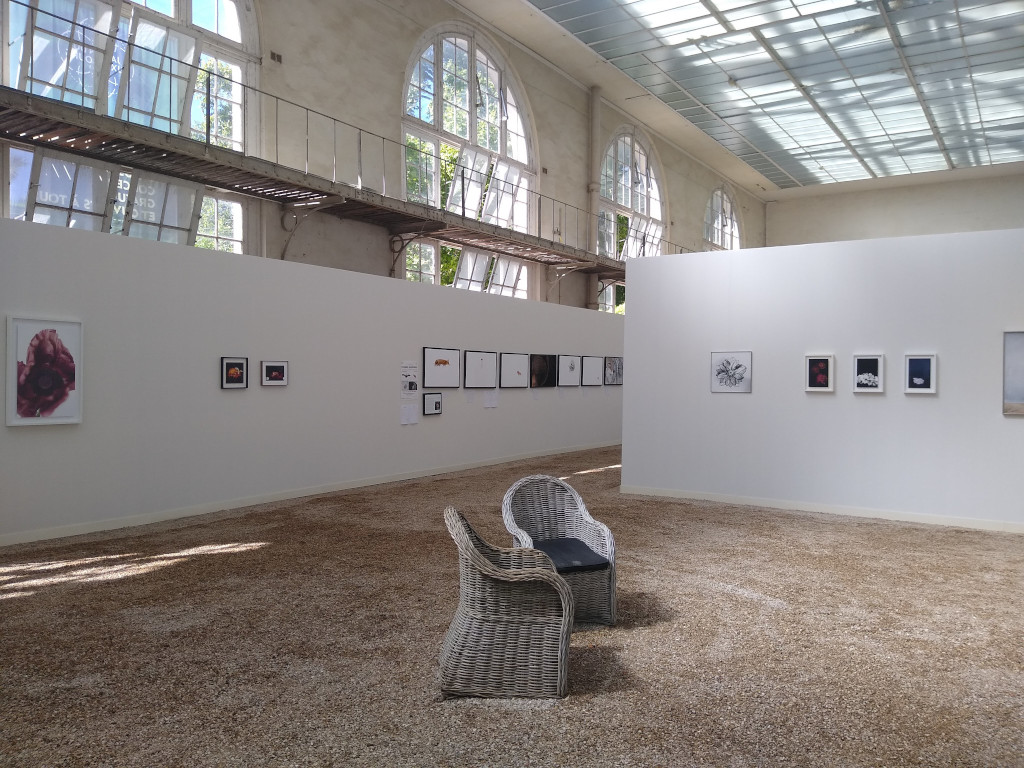

In [16]:
im = PIL.Image.open ('images/IMG_20220803_113815508.jpg')
im

### Métadonnées

Outre l'image elle-même, un fichier image peut contenir des informations à propos de la photo : la date à laquelle la photo a été prise, le lieu où elle a été prise, etc.

### Références

  - 📖 : [Exchangeable image file format (Exif)](https://fr.wikipedia.org/wiki/Exchangeable_image_file_format)

🏗️ Installez le module [🐍 exif](https://pypi.org/project/exif/) puis créez l'objet de type `exif.Image` associé au fichier précédent et listez ses attributs. Quels sont les attributs qui pourraient contenir des informations sur le lieu ou a été prise cette photographie ? Listez ces attributs et leur valeurs.

In [17]:
pip install exif

Note: you may need to restart the kernel to use updated packages.


In [18]:
import exif 
im2= exif.Image('images/IMG_20220803_113815508.jpg')

info = exif.Image.get_all(im2)
info

unable to read tag 'components_configuration'
unable to read tag 'flashpix_version'
unable to read tag 'scene_type'
unable to read tag 'gps_processing_method'


{'make': 'motorola',
 'model': 'moto g(7) power',
 'x_resolution': 300.0,
 'y_resolution': 300.0,
 'resolution_unit': <ResolutionUnit.INCHES: 2>,
 'software': 'GIMP 2.10.18',
 'datetime': '2022:09:08 17:38:33',
 'subsampling_ratio_of_y_to_c': 2,
 'y_and_c_positioning': 1,
 '_exif_ifd_pointer': 222,
 '_gps_ifd_pointer': 726,
 'image_width': 256,
 'image_height': 192,
 'bits_per_sample': 1078,
 'compression': 6,
 'photometric_interpretation': 6,
 'samples_per_pixel': 3,
 'jpeg_interchange_format': 1084,
 'jpeg_interchange_format_length': 9471,
 'exposure_time': 0.004672897196261682,
 'f_number': 2.0,
 'photographic_sensitivity': 100,
 'exif_version': '0220',
 'datetime_original': '2022:08:03 11:38:15',
 'datetime_digitized': '2022:08:03 11:38:15',
 'shutter_speed_value': 7.739,
 'aperture_value': 2.0,
 'brightness_value': 4.83,
 'exposure_bias_value': 0.0,
 'metering_mode': <MeteringMode.CENTER_WEIGHTED_AVERAGE: 2>,
 'flash': Flash(flash_fired=False, flash_return=FlashReturn.NO_STROBE_RE

🏗️ Exploitez les informations précédentes pour déterminer les coordonnées géographiques du lieu de la photographie. Puis, utilisez Folium pour afficher une carte où vous représenterze ce lieu par un marqueur avec une infobulle contenant le nom du lieu.

<div style="background-color:#ffd8a8;">
    
Le nom du paramètre à régler ici est `zoom_start`, pas `start_zoom`.

In [19]:
info['gps_latitude']
info['gps_longitude']


lieu = folium.Map(location = [gc_to_decimal(*info['gps_latitude'],1),gc_to_decimal(*info['gps_longitude'],1)], start_zoom = 1)
    
lieu

# XML en 10 minutes

Pour aborder la suite du projet, nous allons devoir en apprendre un peu plus sur le format de données XML et les façons de manipuler ses documents. 

Voilà un exemple de document XML:

In [20]:
xml_string = """
<data>
    <country name="Liechtenstein">
        <rank>1</rank>
        <year>2008</year>
        <gdppc>141100</gdppc>
        <neighbor name="Austria" direction="E"/>
        <neighbor name="Switzerland" direction="W"/>
    </country>
    <country name="Singapore">
        <rank>4</rank>
        <year>2011</year>
        <gdppc>59900</gdppc>
        <neighbor name="Malaysia" direction="N"/>
    </country>
    <country name="Panama">
        <rank>68</rank>
        <year>2011</year>
        <gdppc>13600</gdppc>
        <neighbor name="Costa Rica" direction="W"/>
        <neighbor name="Colombia" direction="E"/>
    </country>
</data>
"""

Un document XML est une structure hiérarchique (un arbre) composée d'éléments. Chaque élément 

  - a un **type** (ou 🇫🇷 étiquette / 🇺🇸 **tag**),

  - est délimité par des **balises** (ouvrantes et fermantes),
  
  - peut avoir des **attributs**
  
  - peut contenir et/ou être suivi de texte 
  
  - peut contenir d'autres éléments (ses **enfants**).

Ainsi, 

  - la racine du document `xml_string` est de type `data`. 
    Sa balise ouvrante est `<data>` et sa balise fermante `</data>`.
  
  - Il n'a pas d'attributs, mais a trois enfants, tous de type `country`. 
  
  - Les éléments du type `country` possèdent un attribut `name`, 
    ont trois enfants de type `rank`, `year`, `gdppc`, 
    puis un nombre variable d'éléments de type `neighbor`.
  
  - Les éléments de type `rank`, `year` et `gdppc` contiennent du texte qui représente des nombres entiers.
  
  - Les élément de type `neighbor` ont des attributs `name` et `direction` mais ne contiennent pas de texte et n'ont pas d'enfants. 
    Dans ce cas, au lieu d'une balise ouvrante immédiatemment suivie d'une balise fermante, 
    par exemple 
  
        <neighbor name="Austria" direction="E"></neighbor>
      
    une balise **auto-fermante** 
  
        <neighbor name="Austria" direction="E"/> 
      
    est utilisée.

La bibliothèque standard `ElementTree` va nous permettre d'accéder à ces données.

In [21]:
# Python Standard Library
import xml.etree.ElementTree as ET

In [22]:
root = ET.XML(xml_string)
root

<Element 'data' at 0x7f6ff8fe52b0>

In [23]:
isinstance(root, ET.Element)

True

In [24]:
print(ET.tostring(root, encoding="unicode"))

<data>
    <country name="Liechtenstein">
        <rank>1</rank>
        <year>2008</year>
        <gdppc>141100</gdppc>
        <neighbor name="Austria" direction="E" />
        <neighbor name="Switzerland" direction="W" />
    </country>
    <country name="Singapore">
        <rank>4</rank>
        <year>2011</year>
        <gdppc>59900</gdppc>
        <neighbor name="Malaysia" direction="N" />
    </country>
    <country name="Panama">
        <rank>68</rank>
        <year>2011</year>
        <gdppc>13600</gdppc>
        <neighbor name="Costa Rica" direction="W" />
        <neighbor name="Colombia" direction="E" />
    </country>
</data>


In [25]:
data = root

In [26]:
data.tag == "data"

True

In [27]:
data.attrib

{}

In [28]:
countries = data[:]  # Get a list of all children
countries

[<Element 'country' at 0x7f6ff8fe5300>,
 <Element 'country' at 0x7f6ff8fe54e0>,
 <Element 'country' at 0x7f6ff8fe5670>]

In [29]:
data.text  # Whitespace only, used for indentation (non significant)

'\n    '

In [30]:
data.tail is None or data.tail == ""  # The root never has text after its closing tag.

True

In [31]:
first_country = data[0]
first_country

<Element 'country' at 0x7f6ff8fe5300>

In [32]:
print(ET.tostring(root, encoding="unicode"))

<data>
    <country name="Liechtenstein">
        <rank>1</rank>
        <year>2008</year>
        <gdppc>141100</gdppc>
        <neighbor name="Austria" direction="E" />
        <neighbor name="Switzerland" direction="W" />
    </country>
    <country name="Singapore">
        <rank>4</rank>
        <year>2011</year>
        <gdppc>59900</gdppc>
        <neighbor name="Malaysia" direction="N" />
    </country>
    <country name="Panama">
        <rank>68</rank>
        <year>2011</year>
        <gdppc>13600</gdppc>
        <neighbor name="Costa Rica" direction="W" />
        <neighbor name="Colombia" direction="E" />
    </country>
</data>


In [33]:
first_country.attrib

{'name': 'Liechtenstein'}

In [34]:
liechtenstein = first_country

In [35]:
liechtenstein[:]

[<Element 'rank' at 0x7f6ff8fe5350>,
 <Element 'year' at 0x7f6ff8fe53a0>,
 <Element 'gdppc' at 0x7f6ff8fe53f0>,
 <Element 'neighbor' at 0x7f6ff8fe5440>,
 <Element 'neighbor' at 0x7f6ff8fe5490>]

In [36]:
rank, year, gdppc = liechtenstein[0:3]
neighbors = liechtenstein[3:]

In [37]:
rank

<Element 'rank' at 0x7f6ff8fe5350>

In [38]:
ET.tostring(rank, encoding="unicode")

'<rank>1</rank>\n        '

In [39]:
print(ET.tostring(rank, encoding="unicode"))

<rank>1</rank>
        


In [40]:
rank.text

'1'

In [41]:
rank.tail

'\n        '

In [42]:
year.text

'2008'

In [43]:
gdppc.text

'141100'

In [44]:
first_neighbor = neighbors[0]

In [45]:
first_neighbor.tag

'neighbor'

In [46]:
first_neighbor.attrib

{'name': 'Austria', 'direction': 'E'}

In [47]:
austria = first_neighbor

In [48]:
ET.tostring(austria, encoding="unicode")

'<neighbor name="Austria" direction="E" />\n        '

In [49]:
# Self-closing tag: no child and no text
austria[:] == [] and (austria.text is None or austria.text) == ""

False

In [50]:
austria.tail

'\n        '

## OSM XML

OpenStreetMap utilise pour décrire ses cartes le format [OSM XML](https://wiki.openstreetmap.org/wiki/OSM_XML). Ce format est un "dialecte" de XML : les cartes OSM sont toutes des documents XML valides, mais doivent en plus satisfaire des contraintes structurelles propres au dialecte.

Pour en apprendre plus sur la structure des cartes OSM, on procédera de façon expérimentale, en utilisant la carte du jardin du Luxembourg, dont le fichier est `maps/jardin-du-luxembourg.osm`.

🏗️ Chargez ce fichier sous forme d'`Element` XML, sous le nom de variable `osm_xml`.

In [51]:
osm_xml =  ET.parse('maps/jardin-du-luxembourg.osm').getroot()

osm_xml

<Element 'osm' at 0x7f6ff9016480>

Dans les documents OSM XML, les attributs `text` and `tail` des éléments ne contiennent pas d'information significative ; ils sont uniquement utilisés pour indenter les données du fichier pour qu'il soit plus facile à lire. Soient ils valent `None`, soit une chaîne de caractères ne contenant que des caractéres d'espacement (🇺🇸 *whitespace*) : espaces, tabulations, retours chariots, etc. 

Nous allons profiter de cette situation pour transformer notre document XML en un document plus simple et qui vous sera dans doute plus familier, car utilisant uniquement des dictionnaires, des listes et des chaînes de caractères.

La transformation est la suivante : un élement XML est transformé en un dictionnaire associant :

  - à la clé `"type"` le type de l'élément (une chaîne de caractères), 
  
  - à la clé `"attributes"` les attributs de l'élément et leurs valeurs (comme un dictionnaire) et 
  
  - à la clé `"children"` la liste vide `[]` s'il n'a pas d'enfants, ou dans le cas contraire 
    la liste de ses enfants, transformés au préalable.

Les attributs `text` et `tail` des éléments XML sont (volontairement) ignorés dans cette transformation.

On appelera encore élement tout dictionnaire contenant ces trois attributs.

🏗️ Implémentez une fonction `XML_elt_to_dict` opérant cette transformation, puis transformez la carte `osm_xml` en un dictionnaire `osm` et affichez le résultat.

<div style="background-color:#ffd8a8;">
    
La transformation doit également être réalisée "en profondeur" (sur les enfants, les petits-enfants, etc.)
En l'état, ça rend la suite très compliquée ...

In [52]:


def XML_elt_to_dict(xml): 
    return({"type" : xml.tag, "attributes" : xml.attrib, "children" : xml[:]
           })

osm = XML_elt_to_dict(osm_xml)
print(osm)

{'type': 'osm', 'attributes': {'version': '0.6', 'generator': 'CGImap 0.8.8 (969 spike-07.openstreetmap.org)', 'copyright': 'OpenStreetMap and contributors', 'attribution': 'http://www.openstreetmap.org/copyright', 'license': 'http://opendatacommons.org/licenses/odbl/1-0/'}, 'children': [<Element 'bounds' at 0x7f6ff90165c0>, <Element 'node' at 0x7f6ff9016610>, <Element 'node' at 0x7f6ff9016700>, <Element 'node' at 0x7f6ff90167f0>, <Element 'node' at 0x7f6ff9016890>, <Element 'node' at 0x7f6ff9016980>, <Element 'node' at 0x7f6ff9016a70>, <Element 'node' at 0x7f6ff9016b60>, <Element 'node' at 0x7f6ff9016ca0>, <Element 'node' at 0x7f6ff9016d40>, <Element 'node' at 0x7f6ff9016de0>, <Element 'node' at 0x7f6ff9016ed0>, <Element 'node' at 0x7f6ff9016fc0>, <Element 'node' at 0x7f6ff90171a0>, <Element 'node' at 0x7f6ff9017290>, <Element 'node' at 0x7f6ff90173d0>, <Element 'node' at 0x7f6ff9017470>, <Element 'node' at 0x7f6ff9017510>, <Element 'node' at 0x7f6ff90175b0>, <Element 'node' at 0x7f6f

In [53]:
doctest(XML_elt_to_dict, """

## Usage

    >>> import xml.etree.ElementTree as ET
    >>> xml = ET.XML('''
    ... <data>
    ...   <country name="Liechtenstein">
    ...     <neighbor name="Austria" direction="E" />
    ...     <neighbor name="Switzerland" direction="W" />
    ...   </country>
    ...   <country name="Singapore">
    ...     <neighbor name="Malaysia" direction="N" />
    ...   </country>
    ...   <country name="Panama">
    ...     <neighbor name="Costa Rica" direction="W" />
    ...     <neighbor name="Colombia" direction="E" />
    ...   </country>
    ... </data>
    ... ''')
    >>> XML_elt_to_dict(xml)  # doctest: +NORMALIZE_WHITESPACE
    {'type': 'data', 
     'attributes': {}, 
     'children': 
       [{'type': 'country', 
         'attributes': {'name': 'Liechtenstein'}, 
         'children': 
           [{'type': 'neighbor', 
             'attributes': {'name': 'Austria', 'direction': 'E'}, 
             'children': []}, 
            {'type': 'neighbor', 
             'attributes': {'name': 'Switzerland', 'direction': 'W'}, 
             'children': []}]}, 
         {'type': 'country', 
          'attributes': {'name': 'Singapore'}, 
          'children':
            [{'type': 'neighbor', 
              'attributes': {'name': 'Malaysia', 'direction': 'N'}, 
              'children': []}]}, 
         {'type': 'country', 
          'attributes': {'name': 'Panama'}, 
          'children': 
            [{'type': 'neighbor', 
              'attributes': {'name': 'Costa Rica', 'direction': 'W'}, 
              'children': []}, 
             {'type': 'neighbor', 
              'attributes': {'name': 'Colombia', 'direction': 'E'}, 
              'children': []}]}]}
""")

# `XML_elt_to_dict`

## Usage

    >>> import xml.etree.ElementTree as ET
    >>> xml = ET.XML('''
    ... <data>
    ...   <country name="Liechtenstein">
    ...     <neighbor name="Austria" direction="E" />
    ...     <neighbor name="Switzerland" direction="W" />
    ...   </country>
    ...   <country name="Singapore">
    ...     <neighbor name="Malaysia" direction="N" />
    ...   </country>
    ...   <country name="Panama">
    ...     <neighbor name="Costa Rica" direction="W" />
    ...     <neighbor name="Colombia" direction="E" />
    ...   </country>
    ... </data>
    ... ''')
    >>> XML_elt_to_dict(xml)  # doctest: +NORMALIZE_WHITESPACE
    {'type': 'data', 
     'attributes': {}, 
     'children': 
       [{'type': 'country', 
         'attributes': {'name': 'Liechtenstein'}, 
         'children': 
           [{'type': 'neighbor', 
             'attributes': {'name': 'Austria', 'direction': 'E'}, 
             'children': []}, 
            {'type': 'neighbor', 
             'attributes': {'name': 'Switzerland', 'direction': 'W'}, 
             'children': []}]}, 
         {'type': 'country', 
          'attributes': {'name': 'Singapore'}, 
          'children':
            [{'type': 'neighbor', 
              'attributes': {'name': 'Malaysia', 'direction': 'N'}, 
              'children': []}]}, 
         {'type': 'country', 
          'attributes': {'name': 'Panama'}, 
          'children': 
            [{'type': 'neighbor', 
              'attributes': {'name': 'Costa Rica', 'direction': 'W'}, 
              'children': []}, 
             {'type': 'neighbor', 
              'attributes': {'name': 'Colombia', 'direction': 'E'}, 
              'children': []}]}]}

**********************************************************************
File "__main__", line ?, in XML_elt_to_dict
Failed example:
    XML_elt_to_dict(xml)  # doctest: +NORMALIZE_WHITESPACE
Expected:
    {'type': 'data', 
     'attributes': {}, 
     'children': 
       [{'type': 'country', 
         'attributes': {'name': 'Liechtenstein'}, 
         'children': 
           [{'type': 'neighbor', 
             'attributes': {'name': 'Austria', 'direction': 'E'}, 
             'children': []}, 
            {'type': 'neighbor', 
             'attributes': {'name': 'Switzerland', 'direction': 'W'}, 
             'children': []}]}, 
         {'type': 'country', 
          'attributes': {'name': 'Singapore'}, 
          'children':
            [{'type': 'neighbor', 
              'attributes': {'name': 'Malaysia', 'direction': 'N'}, 
              'children': []}]}, 
         {'type': 'country', 
          'attributes': {'name': 'Panama'}, 
          'children': 
            [{'type': 'neigh

## Modèle de données OSM

🏗️ Déterminez expérimentalement :

  - Le type de l'élément racine de cette carte
  
  - Les types possibles de ses enfants 
  
  - Les types possibles de ses petit-enfants
 
A-t'il des arrière-petit-enfants ? 

In [54]:
osm['type']

'osm'

In [55]:
l=[]
for x in osm['children']:
    if x.tag not in l:
        l.append(x.tag)
        
print (l)
        

['bounds', 'node', 'way', 'relation']


In [56]:
L=[]
print( type(osm['children']))


for x in osm['children']:
    enfant = XML_elt_to_dict(x)
    for y in enfant['children']:
        if y.tag not in L :
            L.append(y.tag)

            
print (L)

<class 'list'>
['tag', 'nd', 'member']


In [57]:
ll= []

for x in osm['children']:
    enfant = XML_elt_to_dict(x)
    for y in enfant['children']:
        petits_enfants = XML_elt_to_dict(y)
        for z in petits_enfants['children']:
            ll.append(z)
            
if ll == []:
    print ('pas de petits-enfants')
else :
    print ('il a des petits enfants ')

pas de petits-enfants


🏗️ Définir un ensemble `OSM_XML_TYPES` contenant tous les types d'éléments présents dans la carte.

In [58]:
OSM_XML_TYPES = {osm['type']}


    
for enfant in osm['children']:
    if enfant.tag not in OSM_XML_TYPES:
        OSM_XML_TYPES.add(enfant.tag)
        
    children = XML_elt_to_dict(enfant)
    
            
    for petit_enfant in children[ 'children']:
        if petit_enfant.tag not in OSM_XML_TYPES :
            OSM_XML_TYPES.add(petit_enfant.tag)
            
        little_children = XML_elt_to_dict(petit_enfant)

                
OSM_XML_TYPES
        
        
        
            
        
            

        


{'bounds', 'member', 'nd', 'node', 'osm', 'relation', 'tag', 'way'}

🏗️ Développez une fonction `osm_iter` prenant comme argument un dictionnaire de carte OSM et renvoyant un objet itérable parcourant tous les élements de la carte dans leur ordre d'apparition.

In [59]:
def osm_iter ( osm ) :
    L=[osm_xml]
        
    for enfant in osm['children'] :
        L.append(enfant)
        child = XML_elt_to_dict(enfant)
        
        for petit_enfant in child['children']:
            L.append(petit_enfant)
            
            
    return(L)
            
        
osm_iter(osm)       


[<Element 'osm' at 0x7f6ff9016480>,
 <Element 'bounds' at 0x7f6ff90165c0>,
 <Element 'node' at 0x7f6ff9016610>,
 <Element 'tag' at 0x7f6ff9016660>,
 <Element 'node' at 0x7f6ff9016700>,
 <Element 'tag' at 0x7f6ff9016750>,
 <Element 'node' at 0x7f6ff90167f0>,
 <Element 'node' at 0x7f6ff9016890>,
 <Element 'tag' at 0x7f6ff90168e0>,
 <Element 'node' at 0x7f6ff9016980>,
 <Element 'tag' at 0x7f6ff90169d0>,
 <Element 'node' at 0x7f6ff9016a70>,
 <Element 'tag' at 0x7f6ff9016ac0>,
 <Element 'node' at 0x7f6ff9016b60>,
 <Element 'tag' at 0x7f6ff9016bb0>,
 <Element 'tag' at 0x7f6ff9016c00>,
 <Element 'node' at 0x7f6ff9016ca0>,
 <Element 'node' at 0x7f6ff9016d40>,
 <Element 'node' at 0x7f6ff9016de0>,
 <Element 'tag' at 0x7f6ff9016e30>,
 <Element 'node' at 0x7f6ff9016ed0>,
 <Element 'tag' at 0x7f6ff9016f20>,
 <Element 'node' at 0x7f6ff9016fc0>,
 <Element 'tag' at 0x7f6ff9017010>,
 <Element 'tag' at 0x7f6ff9017060>,
 <Element 'tag' at 0x7f6ff9017100>,
 <Element 'node' at 0x7f6ff90171a0>,
 <Element 't

L'exploration manuelle du dictionnaire de la carte du Jardin du Luxembourg laisse 
entrevoir une structure de données soumises à des nombreuses règles. 
Par exemple, il semble a priori que

  1. seule la racine du document est un élément de type `osm`, 

  2. cette racine du document a (au moins) un enfant du type `bounds`,
  
  3. tous les noeuds sont des enfants de la racine, 
  
  4. les noeuds possédent (parfois ?) des attributs `lat` et `lon`,

  5. les noeuds, voies et relations possèdent (parfois) des étiquettes (éléments `tag`)

  6. les attributs `k` et `v` sont les seuls attributs possibles des tags.

On va tâcher de vérifier ces règles. Pour cela,
on va déterminer le **schéma** des documents OSM en supposant la carte
du jardin du Luxembourg représentative (car assez complexe/grande pour faire
apparaître toutes les constructions possibles). 

Ce schéma que l'on désignera par le nom `OSM_SCHEMA` est un dictionnaire 

  - dont les clés sont les types possibles des éléments d'une carte OSM,

  - qui associe à chaque type un dictionnaire contenant deux clés :

    - `attributes`: un ensemble contenant tous les noms des attributs possibles du type,

    - `children`: les types des enfants qu'il peut avoir.

🏗️ Implémentez une fonction `get_schema` qui renvoie le schéma associé à la carte
qu'elle prend en argument.

In [60]:
def get_schema(osm):
    d = {}
    for x in OSM_XML_TYPES:
        
        d[str(x)] = {"attributes" : [], "children" : [] }
    
    for y in osm_iter(osm):
        element= XML_elt_to_dict(y)
        
        D = d[element["type"]]
        D["attributes"].append(y)
        d[element["type"]] = D
        for child in element["children"] :
            
            if child.tag not in d[element["type"]]["children"] :
                d[element["type"]]["children"].append(child.tag)
            
        
    return(d)

get_schema(osm)       
    
            
            
            
            
                     
        


{'node': {'attributes': [<Element 'node' at 0x7f6ff9016610>,
   <Element 'node' at 0x7f6ff9016700>,
   <Element 'node' at 0x7f6ff90167f0>,
   <Element 'node' at 0x7f6ff9016890>,
   <Element 'node' at 0x7f6ff9016980>,
   <Element 'node' at 0x7f6ff9016a70>,
   <Element 'node' at 0x7f6ff9016b60>,
   <Element 'node' at 0x7f6ff9016ca0>,
   <Element 'node' at 0x7f6ff9016d40>,
   <Element 'node' at 0x7f6ff9016de0>,
   <Element 'node' at 0x7f6ff9016ed0>,
   <Element 'node' at 0x7f6ff9016fc0>,
   <Element 'node' at 0x7f6ff90171a0>,
   <Element 'node' at 0x7f6ff9017290>,
   <Element 'node' at 0x7f6ff90173d0>,
   <Element 'node' at 0x7f6ff9017470>,
   <Element 'node' at 0x7f6ff9017510>,
   <Element 'node' at 0x7f6ff90175b0>,
   <Element 'node' at 0x7f6ff90176a0>,
   <Element 'node' at 0x7f6ff9017790>,
   <Element 'node' at 0x7f6ff9017830>,
   <Element 'node' at 0x7f6ff90178d0>,
   <Element 'node' at 0x7f6ff9017970>,
   <Element 'node' at 0x7f6ff9017a60>,
   <Element 'node' at 0x7f6ff9017b00>,
   

In [61]:
doctest(get_schema, """
## Usage

    >>> import xml.etree.ElementTree as ET
    >>> xml = ET.XML('''
    ... <data>
    ...   <country name="Liechtenstein">
    ...     <neighbor name="Austria" direction="E" />
    ...     <neighbor name="Switzerland" direction="W" />
    ...   </country>
    ...   <country name="Singapore">
    ...     <neighbor name="Malaysia" direction="N" />
    ...   </country>
    ...   <country name="Panama">
    ...     <neighbor name="Costa Rica" direction="W" />
    ...     <neighbor name="Colombia" direction="E" />
    ...   </country>
    ... </data>
    ... ''')
    >>> dct = XML_elt_to_dict(xml)
    >>> get_schema(dct)  # doctest: +NORMALIZE_WHITESPACE
    {'data':
       {'attributes': set(), 
        'children': {'country'}}, 
     'country': 
       {'attributes': {'name'}, 
        'children': {'neighbor'}}, 
     'neighbor': 
       {'attributes': {'name', 'direction'}, 
        'children': set()}}
""")


# `get_schema`

## Usage

    >>> import xml.etree.ElementTree as ET
    >>> xml = ET.XML('''
    ... <data>
    ...   <country name="Liechtenstein">
    ...     <neighbor name="Austria" direction="E" />
    ...     <neighbor name="Switzerland" direction="W" />
    ...   </country>
    ...   <country name="Singapore">
    ...     <neighbor name="Malaysia" direction="N" />
    ...   </country>
    ...   <country name="Panama">
    ...     <neighbor name="Costa Rica" direction="W" />
    ...     <neighbor name="Colombia" direction="E" />
    ...   </country>
    ... </data>
    ... ''')
    >>> dct = XML_elt_to_dict(xml)
    >>> get_schema(dct)  # doctest: +NORMALIZE_WHITESPACE
    {'data':
       {'attributes': set(), 
        'children': {'country'}}, 
     'country': 
       {'attributes': {'name'}, 
        'children': {'neighbor'}}, 
     'neighbor': 
       {'attributes': {'name', 'direction'}, 
        'children': set()}}

**********************************************************************
File "__main__", line ?, in get_schema
Failed example:
    get_schema(dct)  # doctest: +NORMALIZE_WHITESPACE
Exception raised:
    Traceback (most recent call last):
      File "/home/boisgera/miniconda3/lib/python3.10/doctest.py", line 1350, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest get_schema[3]>", line 1, in <module>
        get_schema(dct)  # doctest: +NORMALIZE_WHITESPACE
      File "/tmp/ipykernel_34606/3414714497.py", line 10, in get_schema
        D = d[element["type"]]
    KeyError: 'country'


🏗️ Vérifiez que les règles 1. à 6. sont valables.

In [62]:
schema = get_schema(osm)

print(schema ["osm"]["attributes"]) # un seul élément, la racine
print(schema["osm"]["children"]) # un des enfants est de type bounds

# vérification 3

s=0
for element in schema["node"]["attributes"] :
    if element in osm["children"]:
        s+=1
if s== len(schema["node"]["attributes"]):
    print ("tous les noeuds sont des enfants de la racine")
    
else :
    print("tous les noeuds ne sont pas des enfants de la racine")

# vérification 4    

x=0
y=0
    
for element in schema["node"]["attributes"] :
    noeuds = XML_elt_to_dict(element)
    for k in noeuds["attributes"] :
        if "lat" == k and x ==0:
            print("les noeuds possédent des attributs lat")
            x+=1
        if "lon" == k and y ==0:
            print("les noeuds possédent des attributs lon")
            y+=1
if x == 0 :
    print("les noeuds ne possédent pas des attributs lat")
if y == 0:
    print("les noeuds ne possédent pas des attributs lon")

# vérification 5
L= ["node","relation", "way"]
for k in L :
    f=0
    for element in schema[k]["attributes"]:
        if element.tag != "" and f == 0:
            print(f"{k}"+" possede des étiquettes")
            f+=1

# vérification 6            
g = 0
for element in schema["tag"]["attributes"]:
    for h in element.attrib :
        
        if h != "k" and h != "v" and g == 0:
            print("les attributs k et v ne sont pas les seuls attributs possibles des tags.")
            g+=1
        
if g == 0:
    print("les attributs k et v sont les seuls attributs possibles des tags.")

[<Element 'osm' at 0x7f6ff9016480>]
['bounds', 'node', 'way', 'relation']
tous les noeuds sont des enfants de la racine
les noeuds possédent des attributs lat
les noeuds possédent des attributs lon
node possede des étiquettes
relation possede des étiquettes
way possede des étiquettes
les attributs k et v sont les seuls attributs possibles des tags.


## Recherche dans la carte

🏗️ Implémentez une fonction `search` permettant de lister ceux qui parmi les enfants d'une carte `osm` les élements sont d'un `type` donné et d'un attribut `id` donné. En l'absence de l'un et/ou de l'autre des arguments, on considérera que tous les éléments satisfont ce critère (en particulier, si l'on ne spécifie ni type ni id, tous les enfants de la carte devront être renvoyés).

In [63]:
def search1(osm, type=None, id=None):
    
    if type == None and id == None :
        return (osm["children"])
    
    if type != None and id == None :
        L=[]
        for element in osm["children"]:
            if element.tag == type :
                L.append (element)
        return(L)
    
    if type == None and id != None :
        L=[]
        for element in osm["children"]:
            for attribut in element.attrib :
                if attribut == id :
                    L.append (element)
        return(L)
    
    if type != None and id != None :
        L=[]
        X=[]
        for element in osm["children"]:
            for attribut in element.attrib :
                if attribut == id :
                    L.append (element)
        for element in L:
            if element.tag == type :
                X.append (element)
        return(X)
    
        
    

In [64]:
doctest(search, """
Search the children of a map by feature.

Arguments
---------

  - `type`: the type of elements to search for (a string) or `None` for all elements,

  - `id`: the id of the elements to search for (a string) or `None` for all elements.

The function returns the elements that meet ALL of these conditions. 


Returns
-------

  - `found`: a list of elements


Usage
-----

    >>> children = osm["children"]
    >>> search(osm) == children
    True
    >>> bounds = search(osm, type="bounds")
    >>> len(bounds) == 1
    True
    >>> bounds[0]
    {'type': 'bounds', 'attributes': {'minlat': '48.8440900', 'minlon': '2.3300500', 'maxlat': '48.8493300', 'maxlon': '2.3426800'}, 'children': []}

    >>> nodes = search(osm, type="node")
    >>> len(nodes)
    12993
    >>> ways = search(osm, type="way")
    >>> len(ways)
    1308
    >>> relations = search(osm, type="relation")
    >>> len(relations)
    262

    >>> len(children) == 1 + 12993 + 1308 + 262
    True

    >>> luxembourg_id = "128206209"
    >>> found = search(osm, id=luxembourg_id)
    >>> len(found) == 1
    True
    >>> luxembourg = found[0]
    >>> luxembourg  # doctest: +ELLIPSIS, +NORMALIZE_WHITESPACE
    {'type': 'way', 'attributes': {'id': '128206209', ... 
    {'type': 'tag', 'attributes': {'k': 'wikipedia', 'v': 'fr:Jardin du Luxembourg'}, 'children': []}]}

    >>> found == search(osm, type="way", id=luxembourg_id)
    True
    >>> [] == search(osm, type="node", id=luxembourg_id)
    True

""")

NameError: name 'search' is not defined

🏗️ Enrichissez votre fonction pour qu'elle permette également de chercher des 
éléments selon les clés et les valeurs de leurs (éventuelles) étiquettes.

In [ ]:
def search(osm, type=None, id=None, key=None, value=None):
    L= search1(osm, type,id )
    X= []
    Y=[]
    if key != None :
        for k in L:
            if k.key == key :
                X.append(k)
                
    if key == None :
        X==L
        
    if value == None :
        Y==X
    if value != None :
        for element in X :
            if element.tag == value :
                Y.append(element)
                
    return(Y)
        
        


In [ ]:
doctest(search, """
Search the children of a map by feature.

Arguments
---------

  - `type`: the type of elements to search for (a string) or `None` for all elements,

  - `id`: the id of the elements to search for (a string) or `None` for all elements,

  - `key`: search for elements having a tag with this key (or all if `key` is `None`)

  - `value`: search for elements having a tag with this value (or all if `value` is `None`)

The function returns the elements that meet ALL of these conditions. 
If both a key and a value are specified, the key and value should match for
the same attributes.

Returns
-------

  - `found`: a list of elements

Usage
-----

    >>> children = osm["children"]
    >>> search(osm) == children
    True
    >>> bounds = search(osm, type="bounds")
    >>> len(bounds) == 1
    True
    >>> bounds[0]
    {'type': 'bounds', 'attributes': {'minlat': '48.8440900', 'minlon': '2.3300500', 'maxlat': '48.8493300', 'maxlon': '2.3426800'}, 'children': []}

    >>> nodes = search(osm, type="node")
    >>> len(nodes)
    12993
    >>> ways = search(osm, type="way")
    >>> len(ways)
    1308
    >>> relations = search(osm, type="relation")
    >>> len(relations)
    262

    >>> len(children) == 1 + 12993 + 1308 + 262
    True

    >>> parks = search(osm, key="leisure", value="park")
    >>> len(parks)
    4

    >>> found = search(osm, key="name", value="Jardin du Luxembourg")
    >>> len(found)
    1
    >>> luxembourg = found[0]
    >>> luxembourg in parks
    True

    >>> luxembourg_id = luxembourg["attributes"]["id"]
    >>> luxembourg_id
    '128206209'
    >>> found = search(osm, id=luxembourg_id)
    >>> len(found) == 1
    True
    >>> luxembourg in found
    True

    >>> found == search(osm, type="way", id=luxembourg_id)
    True
    >>> [] == search(osm, type="node", id=luxembourg_id)
    True

  """)

Des recherches répétées peuvent finir par demander beaucoup de temps. 
Les deux cellules qui suivent fournissent une estimation du temps nécessaire pour une unique recherche d'éléments par id (ici, le jardin du luxembourg)

In [ ]:
jardin_du_luxembourg_id = "128206209"

In [ ]:
%%timeit
search(osm, id=jardin_du_luxembourg_id)

En créant une fois pour toute un dictionnaire indexant des éléments par leur id
(supposé unique dans le document), on peut considérablement améliorer la performance de cette recherche.

🏗️ Créez un tel index pour la carte du Jardin du Luxembourg, 
puis évaluez le temps que demande la création d'un tel index. Comparer ce temps
avec celui que prend une simple recherche par id ; est-ce significativement 
plus long ? 10x ? 100x ? 1000x plus long ? Une fois l'index créé, 
combien de temps faut-il pour l'utiliser pour une recherche par id ? A nouveau,
comparer avec le temps que prend une recherche classique.

In [ ]:
index = {}

for k in range(len(osm_iter(osm))) :
    index[str(k)] = osm_iter(osm)[k]
            
            


In [ ]:
%%timeit
index[jardin_du_luxembourg_id] 

## Tracé des cartes

Dans le format OSM, les voies sont représentées par des éléments de type `way`.
Leur fonction principale est de référencer une liste de noeuds dont la localisation est donné par les attributs `lat` et `lon` (latitude et longitude).

🏗️ Explorez la structure des voies dans le document, puis une fois que vous avez
compris leur lien avec les noeuds, implémentez la fonction `compute_latlon` 
spécifiée ci-dessous.

In [ ]:
def compute_latlon(osm, way):
    pass

In [ ]:
doctest(compute_latlon, """
Return the latitude and longitude of all nodes refered to by a way

## Arguments

  - `osm`: an OSM map element

  - `way`: an OSM way element

## Returns

  - `latlon`: a NumPy array of floats of shape `(2, n)` 
    where `n` is the list of nodes in the way.

## Usage

    >>> osm = {
    ...     "type": "osm",
    ...     "attributes": [], 
    ...     "children":
    ...     [
    ...         {"type": "node", "attributes": {"id": "5", "lat": "45.0", "lon": "90.0"}, "children": []},
    ...         {"type": "node", "attributes": {"id": "42", "lat": "-45.0", "lon": "0.0"}, "children": []},
    ...         {"type": "node", "attributes": {"id": "0", "lat": "0.0", "lon": "0.0"}, "children": []},
    ...         {"type": "way", "attributes": {}, "children":
    ...             [
    ...               {"type": "nd", "attributes": {"ref": "42"}, "children": []},
    ...               {"type": "nd", "attributes": {"ref": "5"}, "children": []},
    ...               {"type": "nd", "attributes": {"ref": "0"}, "children": []},
    ...             ]
    ...         }
    ...     ]
    ... }
    >>> way = search(osm, "way")[0]
    >>> compute_latlon(osm, way)
    array([[-45.,  45.,   0.],
           [  0.,  90.,   0.]])

""")

🏗️ Tracer avec Matplotlib l'ensemble des voies, avec la longitude en abscisse et la latitude en ordonnée. On tracera toutes ces voie en noir (sur fond blanc)  en ajustant la largeur du trait
pour que le résultat soit aussi lisible que possible. On s'assuera également que les axes sont orthonormés.

In [ ]:
pass

Vous avez sans doute constaté qu'une partie des voies déborde de la zone qui nous intéresse.

🏗️ Utilisez l'information sur les bornes de la latitude et la longitude présente dans la carte pour réiterer le tracé en affichant uniquement la zone d'intérêt.
 

In [ ]:
pass

La carte que vous venez d'afficher ne ressemble pas tout à fait à celles que fournissent des OpenStreetMap ou Google Maps ; en particulier des motifs géométriques tels que des carrés ou des cercles ne sont pas affichés comme tels, mais sont déformés.

🏗️ Renseignez-vous sur la projection de Mercator (la version "pseudo-Mercator" utilisant un modèle sphérique du globe de rayon 6378137 mètres est suffisante pour nos besoins) et développez une fonction `compute_xy` qui prend les même arguments que `compute_latlon` mais renvoie un tableau NumPy contenant les coordonnées dans le système projeté.

In [ ]:
pass

In [ ]:
doctest(compute_xy, """
Return the coordinates of all nodes refered to by a way in the spherical
pseudo-Mercator projection with radius 6378137 meters.

## Arguments

  - `osm`: an OSM map element

  - `way`: an OSM way element

## Returns

  - `xy`: a NumPy array of floats of shape `(2, n)` 
    where `n` is the list of nodes in the way.

## Usage

    >>> osm = {
    ...     "type": "osm",
    ...     "attributes": [], 
    ...     "children":
    ...     [
    ...         {"type": "node", "attributes": {"id": "5", "lat": "45.0", "lon": "90.0"}, "children": []},
    ...         {"type": "node", "attributes": {"id": "42", "lat": "-45.0", "lon": "0.0"}, "children": []},
    ...         {"type": "node", "attributes": {"id": "0", "lat": "0.0", "lon": "0.0"}, "children": []},
    ...         {"type": "way", "attributes": {}, "children":
    ...             [
    ...               {"type": "nd", "attributes": {"ref": "42"}, "children": []},
    ...               {"type": "nd", "attributes": {"ref": "5"}, "children": []},
    ...               {"type": "nd", "attributes": {"ref": "0"}, "children": []},
    ...             ]
    ...         }
    ...     ]
    ... }
    >>> way = search(osm, "way")[0]
    >>> compute_xy(osm, way)
    array([[ 0.00000000e+00,  1.00187542e+07,  0.00000000e+00],
           [-5.62152149e+06,  5.62152149e+06, -7.08115455e-10]])
""")

🏗️ Représenter à nouveau la carte dans ce nouveau système de coordonnées.
Est-ce que cela améliore la situation ?

In [ ]:
pass

Les voies représentant un contour fermé délimite des espaces sur la carte, 
que l'on peut colorier selon leur nature (décrite par les tags associés à
la voie) pour rendre la carte plus informative. 

🏗️ Déterminez quelles clés (et éventuellement valeurs) de tags caractérisent :

  - les parcs.

  - les espaces avec de l'herbe, des bois ou des vergers.

  - les espaces occupés par de l'eau.

  - les espaces sportifs.

  - les bâtiments (de tout type).

puis choisir une couleur appropriée pour chaque type.

### Référence

  - 📖 [Open Color](https://yeun.github.io/open-color/)

In [ ]:
pass

🏗️ Tracez une nouvelle carte exploitant ce jeu de couleurs.

In [ ]:
pass